In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
state_txn = pd.read_excel(r'phonepe.xlsx', sheet_name = 'State_Txn and Users')
state_txnsplit = pd.read_excel(r'phonepe.xlsx', sheet_name = 'State_TxnSplit')
state_devicedata = pd.read_excel(r'phonepe.xlsx', sheet_name = 'State_DeviceData')
district_txn = pd.read_excel(r'phonepe.xlsx', sheet_name = 'District_Txn and Users')
district_demographics = pd.read_excel(r'phonepe.xlsx', sheet_name = 'District Demographics')

In [3]:
#display first 5 rows of state transaction dataset
state_txn.head(5)
#display bottom 10 rows of state transaction split dataset
state_txnsplit.tail(10)
#display 10 rows from middle of the state device datset
state_devicedata.iloc[len(state_devicedata)//2 - 5 : len(state_devicedata)//2 + 5]
#display first 10 rows and last 10 rows of the district transaction and user datset
pd.concat([district_txn.head(10),district_txn.tail(10)])
pd.concat([district_txn.iloc[:10],district_txn.iloc[-10:]])
#Used to combine DataFrames
#→ You can stack them vertically (rows) or horizontally (columns).
#Always pass DataFrames inside a list
#✅ Correct: pd.concat([df1, df2])
#❌ Incorrect: pd.concat(df1, df2)
#axis=0 (default)
#→ Combines row-wise (adds rows below).
#→ Think of stacking data on top of each other.
#axis=1
#→ Combines column-wise (adds new columns side by side).
#→ Make sure both DataFrames have the same number of rows (or handle misalignment).
           
#display every 10th row of district demographics
district_demographics.iloc[::10]

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


,State,Year,Quarter,Brand,Registered Users,Percentage
2767,Ladakh,2021,2,OnePlus,1741,0.023198
2768,Ladakh,2021,2,Motorola,922,0.012285
2769,Ladakh,2021,2,Huawei,894,0.011912
2770,Ladakh,2021,2,Lenovo,490,0.006529
2771,Ladakh,2021,2,Others,2610,0.034778
2772,Lakshadweep,2018,1,Samsung,102,0.203593
2773,Lakshadweep,2018,1,Xiaomi,100,0.199601
2774,Lakshadweep,2018,1,Vivo,67,0.133733
2775,Lakshadweep,2018,1,Oppo,56,0.111776
2776,Lakshadweep,2018,1,Huawei,25,0.049900


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.0,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.0,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.0,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.0,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.0,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.0,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.0,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.0,14557,DL04,North


In [4]:
state_txn.info()
state_txnsplit.info()
state_devicedata.info()
district_txn.info()
district_demographics.info()
#.info() Gives a summary of the structure of your DataFrame.
#what insights we dervied from this datasets
#state_txn : Amount (INR) column has one missing value/null value
#district_txn : Code column has 28 missing value/null value, ATV (INR) has 4 missing/null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             504 non-null    object 
 1   Year              504 non-null    int64  
 2   Quarter           504 non-null    int64  
 3   Transactions      504 non-null    int64  
 4   Amount (INR)      503 non-null    float64
 5   ATV (INR)         504 non-null    float64
 6   Registered Users  504 non-null    int64  
 7   App Opens         504 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 31.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2514 non-null   object 
 1   Year              2514 non-null   int64  
 2   Quarter           2514 non-null   int64  
 3   Transaction Type 

In [5]:
#percentage of missing values for each column that has missing values:

#for amount column in state transactions df
state_txn['Amount (INR)'].isnull().sum()
#Amount (INR) column has only one missing values
(state_txn['Amount (INR)'].isnull().sum()/state_txn.shape[0]) * 100
#percentage of missing values for amount column : 0.19%

#for Code column in district transaction df
district_txn['Code'].isnull().sum()
(district_txn['Code'].isnull().sum()/district_txn.shape[0]) * 100
#percentage of missing values for code column : 0.27%

#for Code column in district transaction df
district_txn['ATV (INR)'].isnull().sum()
(district_txn['ATV (INR)'].isnull().sum()/district_txn.shape[0]) * 100
#percentage of missing values for code column : 0.04%


1

0.1984126984126984

28

0.273224043715847

4

0.039032006245121

In [6]:
#Total number of states and district
district_demographics['State'].value_counts()

Uttar Pradesh                           75
Madhya Pradesh                          55
Tamil Nadu                              38
Bihar                                   38
Maharashtra                             36
Assam                                   34
Rajasthan                               33
Telangana                               33
Gujarat                                 33
Karnataka                               31
Odisha                                  30
Chhattisgarh                            28
Arunachal Pradesh                       25
Jharkhand                               24
West Bengal                             23
Punjab                                  23
Haryana                                 22
Jammu & Kashmir                         20
Manipur                                 16
Kerala                                  14
Uttarakhand                             13
Andhra Pradesh                          13
Nagaland                                12
Himachal Pr

In [7]:
#Number of distinct states
Total_states = district_demographics['State'].nunique()
print(f"Total number of states: {Total_states}")

#But we know some districts across different states have the same name (like "Aurangabad" in both Maharashtra and Bihar)
#Total number of unique (State, District) combinations
Total_district = district_demographics[['State','District']].drop_duplicates().shape[0]
print(f"Total number of districts: {Total_district}")

#summary table consisting states along with their total number of district
district_demographics.pivot_table(index = 'State', values = 'District', aggfunc= 'count', margins = True).reset_index()

#lets we wants to see the districts across different states have the same name
district_demographics[district_demographics['District'].duplicated(keep = False)].sort_values(by = 'District')

Total number of states: 36
Total number of districts: 742


,State,District
0,Andaman & Nicobar Islands,3
1,Andhra Pradesh,13
2,Arunachal Pradesh,25
3,Assam,34
4,Bihar,38
5,Chandigarh,1
6,Chhattisgarh,28
7,Dadra & Nagar Haveli and Daman & Diu,3
8,Delhi,11
9,Goa,2


,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
74,Bihar,Aurangabad,Aurangabad,2511243,3303.0,760,BR03,Aurangabad
334,Maharashtra,Aurangabad,Aurangabad,3695928,10107.0,365,MH04,Aurangabad
112,Chhattisgarh,Balrampur,Balrampur,730491,3806.0,190,CG03,Balrampur
597,Uttar Pradesh,Balrampur,Balrampur,2149066,3349.0,642,UP12,Balrampur
115,Chhattisgarh,Bijapur,Bijapur,229832,6562.0,35,CG06,Bijapur
237,Karnataka,Bijapur,Bijapur,2175102,10517.0,207,KA07,Vijayapura
116,Chhattisgarh,Bilaspur,Bilaspur,1961922,3508.0,460,CG07,Bilaspur
195,Himachal Pradesh,Bilaspur,Bilaspur,382056,1167.0,327,HP01,Bilaspur
197,Himachal Pradesh,Hamirpur,Hamirpur,454293,1118.0,406,HP03,Hamirpur
620,Uttar Pradesh,Hamirpur,Hamirpur,1104021,4325.0,268,UP35,Hamirpur


In [8]:
#finding the key
(district_demographics.groupby(['State','District']).size()>1).sum() == 0
#State with maximum number of district
district_demographics[['State','District']]['State'].value_counts().idxmax()
#max number of district in a state 
district_demographics[['State','District']]['State'].value_counts().max()

True

'Uttar Pradesh'

75

In [9]:
#imput the missing value
state_txn[state_txn['Amount (INR)'].isnull()]

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
26,Andhra Pradesh,2021,1,289747970,NaN,0.0,18363733,957709447


In [10]:
state_summ = state_txnsplit.groupby(['State','Year','Quarter']).agg(ImputedAmount = ('Amount (INR)','sum')).reset_index()
state_txn = state_txn.merge(state_summ, on = ['State','Year','Quarter'], how = 'left')

In [11]:
#imputing missing values
state_txn['Amount (INR)'] = state_txn['Amount (INR)'].fillna(state_txn['ImputedAmount'])

In [12]:
state_txn['Amount (INR)'].isnull().sum()
state_txn.drop(columns = 'ImputedAmount', inplace = True)

0

In [13]:
state_txn.loc[state_txn['ATV (INR)']==0,'ATV (INR)'] = state_txn['Amount (INR)']/state_txn['Transactions']

In [14]:
#2.1: Analyze transaction trends over the years for each state
state_year_txn_summ = state_txn.groupby(['State','Year'])[['Transactions','Amount (INR)']].sum().reset_index()
#state_txn_year_summ.sort_values(by = 'Transactions', ascending = False)

#summary of states transaction
state_txn_sum = state_txn.groupby('State')[['Transactions','Amount (INR)']].sum()

#Top 5 state with high volumne of transactions
state_txn_sum.sort_values(by = 'Transactions', ascending = False).head(5)

#Top 5 state with low volumne of transactions
state_txn_sum.sort_values(by = 'Transactions', ascending = True).head(5)

,Transactions,Amount (INR)
State,,
Karnataka,2981044533,4.361396e+12
Maharashtra,2833670154,4.290995e+12
Telangana,2347430243,4.574246e+12
Andhra Pradesh,1781091169,3.860292e+12
Rajasthan,1382918930,2.625584e+12


,Transactions,Amount (INR)
State,,
Lakshadweep,71610,1.921587e+08
Andaman & Nicobar Islands,1223565,3.641818e+09
Ladakh,1880109,6.606978e+09
Mizoram,2162776,6.317141e+09
Meghalaya,5648913,1.254162e+10


,State,Year,Transactions,Amount (INR)
60,Karnataka,2018,99925678,1.739670e+11
61,Karnataka,2019,610519200,7.912623e+11
62,Karnataka,2020,1216153117,1.803284e+12
63,Karnataka,2021,1054446538,1.592883e+12


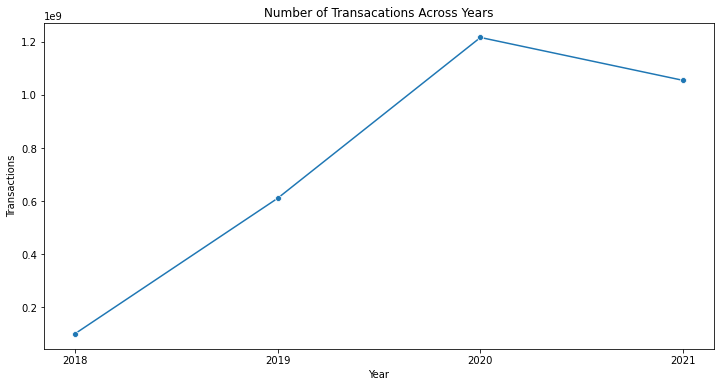

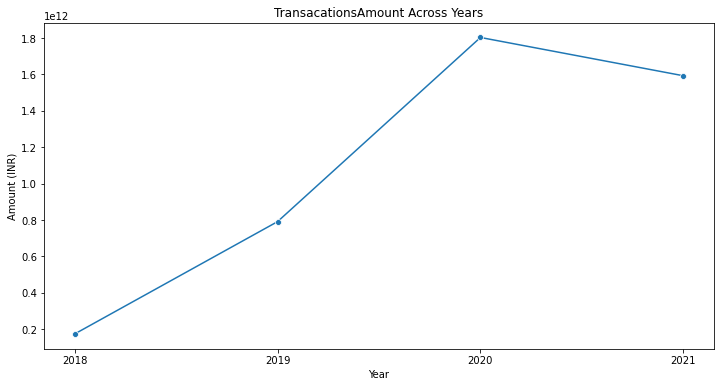

In [15]:
#lets see the number of transactions across years
def state_yearly_transaction(state):
    df = state_year_txn_summ[state_year_txn_summ['State'] == state]
    plt.figure(figsize = (12,6))
    sns.lineplot(data = df, x = 'Year', y = 'Transactions', marker = 'o')
    plt.title('Number of Transacations Across Years')
    plt.xticks(np.arange(df['Year'].min(),df['Year'].max()+1))
    
    plt.figure(figsize = (12,6))
    sns.lineplot(data = df, x = 'Year', y = 'Amount (INR)', marker = 'o')
    plt.title('TransacationsAmount Across Years')
    plt.xticks(np.arange(df['Year'].min(),df['Year'].max()+1))
    return df
#in this given dataset, we have data of first two quarter of year 2021 only.

state_yearly_transaction('Karnataka')


In [16]:
# Identify the most common transaction types in each state and quarter
#For each state and quarter, determine the most frequent transaction type.
max_qtr_trans = state_txnsplit.groupby(['State','Year','Quarter'])['Transactions'].max().reset_index()
max_qtr_trans = max_qtr_trans.merge(state_txnsplit[['State','Year','Quarter','Transactions','Transaction Type']], on = ['State','Year','Quarter','Transactions'], how = 'left')
max_qtr_trans

,State,Year,Quarter,Transactions,Transaction Type
0,Andaman & Nicobar Islands,2018,1,4200,Recharge & bill payments
1,Andaman & Nicobar Islands,2018,2,6735,Recharge & bill payments
2,Andaman & Nicobar Islands,2018,3,8636,Recharge & bill payments
3,Andaman & Nicobar Islands,2018,4,11517,Recharge & bill payments
4,Andaman & Nicobar Islands,2019,1,15263,Recharge & bill payments
...,...,...,...,...,...
499,West Bengal,2020,2,24855687,Peer-to-peer payments
500,West Bengal,2020,3,37556349,Peer-to-peer payments
501,West Bengal,2020,4,46437233,Peer-to-peer payments
502,West Bengal,2021,1,53869075,Peer-to-peer payments


In [17]:
#for each state, quarter which is most frequent
max_qtr_trans['Transaction Type'].value_counts().reset_index()

#Among the maximun transactions per quarter which transaction type transactions are high: 
max_qtr_trans.groupby('Transaction Type')['Transactions'].sum().reset_index().sort_values(by = 'Transactions', ascending = False)

,index,Transaction Type
0,Peer-to-peer payments,311
1,Recharge & bill payments,162
2,Merchant payments,31


,Transaction Type,Transactions
1,Peer-to-peer payments,6445611071
0,Merchant payments,2923345775
2,Recharge & bill payments,295156360


In [18]:
#Determine the device brand with the highest number of registered users in each state
#1. Identify the device brand with the highest number of registered users in each state. Display the results in a tabular format.
registered_user = state_devicedata.groupby(['State','Brand'])['Registered Users'].sum().reset_index()
registered_user = registered_user.sort_values(by = ['State','Registered Users'], ascending = [True,False])
registered_user.groupby('State')[['Brand','Registered Users']].first()

,Brand,Registered Users
State,,
Andaman & Nicobar Islands,Xiaomi,97889
Andhra Pradesh,Xiaomi,40061549
Arunachal Pradesh,Xiaomi,437803
Assam,Xiaomi,6979357
Bihar,Xiaomi,33721314
Chandigarh,Xiaomi,896628
Chhattisgarh,Xiaomi,8763373
Dadra & Nagar Haveli and Daman & Diu,Xiaomi,638834
Delhi,Xiaomi,24114984


,State,Population,District
0,Andaman & Nicobar Islands,238142,South Andaman
1,Andhra Pradesh,5151549,East Godavari
2,Arunachal Pradesh,176385,Papum Pare
3,Assam,2826006,Nagaon
4,Bihar,5772804,Patna
5,Chandigarh,1055450,Chandigarh
6,Chhattisgarh,2160876,Raipur
7,Dadra & Nagar Haveli and Daman & Diu,343709,Dadra and Nagar Haveli
8,Delhi,3656539,North West Delhi
9,Goa,817761,North Goa


<Figure size 1008x576 with 0 Axes>

<AxesSubplot:xlabel='Population', ylabel='State'>

Text(0.5, 1.0, 'Top District by Population in Each State')

Text(0.5, 0, 'Population')

Text(0, 0.5, 'State')

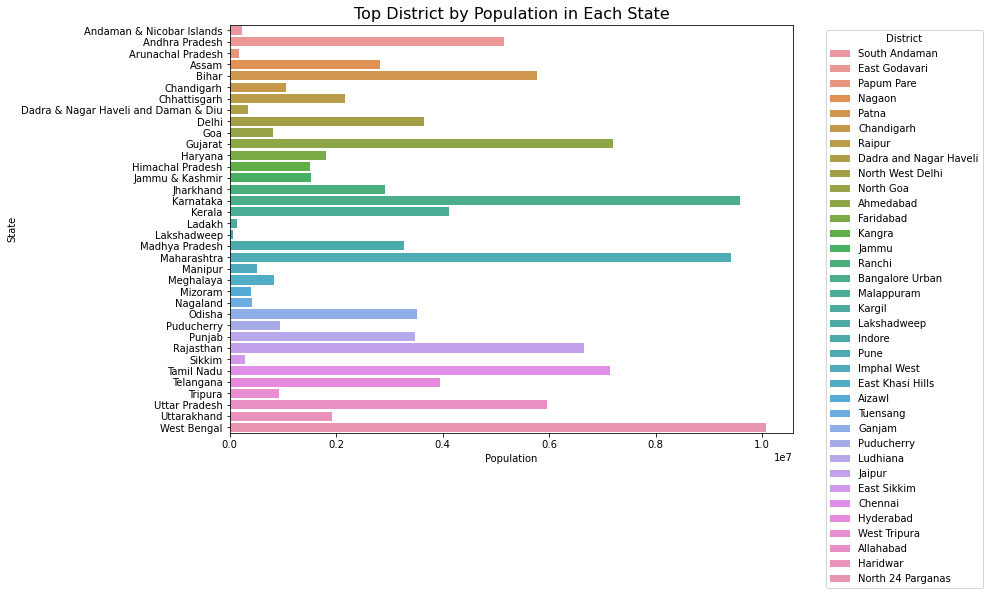

In [19]:
# Create a list of the top district per state based on population
# For each state, identify the district with the highest population. Display the results in a tabular format.
# Create a column chart depicting the district with the highest population for each state.
state_dist_max_pop = district_demographics.groupby(['State'])['Population'].max().reset_index()
state_dist_max_pop = state_dist_max_pop.merge(district_demographics[['State','District','Population']], on = ['State','Population'], how = 'left') 
state_dist_max_pop

plt.figure(figsize = (14,8))
sns.barplot(data = state_dist_max_pop, x = 'Population', y = 'State', hue = 'District', dodge = False)
plt.title("Top District by Population in Each State", fontsize=16)
plt.xlabel("Population")
plt.ylabel("State")
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [20]:
#Calculate the average transaction value (ATV) for each state
#1. Compute the average transaction value for each state. Display the results in a tabular format.
#2. Identify the top 5 states with the highest ATV and the top 5 states with the lowest ATV. Display the results.

state_atv = state_txn.groupby('State')[['Amount (INR)','Transactions']].sum().reset_index()
state_atv['ATV (INR)'] = state_atv['Amount (INR)']/state_atv['Transactions']
#Top 5 States with higest ATV
state_atv.sort_values(by = 'ATV (INR)', ascending = False).head(5)
#Top 5 States with lowest ATV
state_atv.sort_values(by = 'ATV (INR)', ascending = False).tail(5)

,State,Amount (INR),Transactions,ATV (INR)
17,Ladakh,6.606978e+09,1880109,3514.146494
0,Andaman & Nicobar Islands,3.641818e+09,1223565,2976.399178
23,Mizoram,6.317141e+09,2162776,2920.848685
21,Manipur,3.579325e+10,12318043,2905.757931
24,Nagaland,1.638757e+10,5864977,2794.140997


,State,Amount (INR),Transactions,ATV (INR)
8,Delhi,1.649942e+12,1011031124,1631.940078
35,West Bengal,1.452707e+12,942286041,1541.683482
20,Maharashtra,4.290995e+12,2833670154,1514.288897
7,Dadra & Nagar Haveli and Daman & Diu,1.865878e+10,12462185,1497.232192
15,Karnataka,4.361396e+12,2981044533,1463.042846


C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_17028\283757903.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_app['Period'] = state_app['Year'].astype(str) + 'Q' + state_app['Quarter'].astype(str)


,State,Period,App Opens
280,Maharashtra,2018Q1,0
281,Maharashtra,2018Q2,0
282,Maharashtra,2018Q3,0
283,Maharashtra,2018Q4,0
284,Maharashtra,2019Q1,0
285,Maharashtra,2019Q2,109967705
286,Maharashtra,2019Q3,439998413
287,Maharashtra,2019Q4,543654112
288,Maharashtra,2020Q1,615146568
289,Maharashtra,2020Q2,506354812


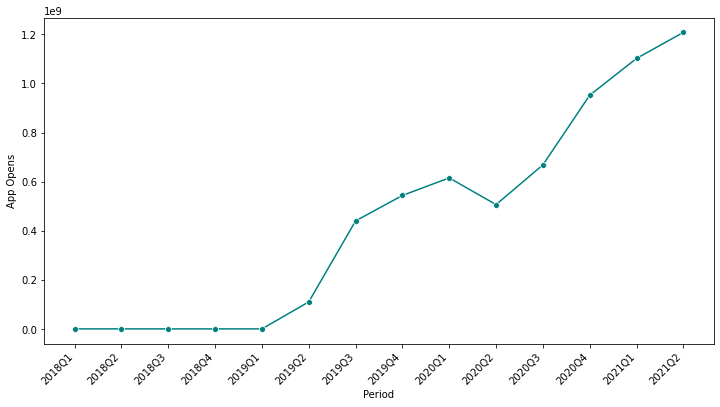

In [21]:
#: Analyze app usage trends
#1. Calculate the total number of app opens over the years and quarters for each state. Display the results in a tabular format.
#2. Identify trends in app usage by creating a line plot showing the number of app opens over time for a selected state.
def state_app_opens(state):
    state_app = state_txn[state_txn['State'] == state]
    state_app['Period'] = state_app['Year'].astype(str) + 'Q' + state_app['Quarter'].astype(str)
    plt.figure(figsize = (12,6))
    sns.lineplot(data = state_app, x = 'Period', y = 'App Opens', marker = 'o',color = 'teal')
    plt.xticks(rotation = 45, ha = 'right' )
    return state_app[['State','Period','App Opens']]

state_app_opens('Maharashtra')

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='State', ylabel='Transactions'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'Andaman & Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra & Nagar Haveli and Daman & Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Ladakh'),
  Text(18, 0, 'Lakshadweep'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Maharashtra'),
  Text(21, 0, 'Manipur'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Mizoram'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Odisha'),
  Text(26, 0, 'Puducherry'),
  Text(27, 0, 'Punjab'),
  Text(28, 0

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
65,Andaman & Nicobar Islands,2021,2,Peer-to-peer payments,132772,7.483820e+08,5636.595402
66,Andaman & Nicobar Islands,2021,2,Recharge & bill payments,120911,4.369196e+07,361.356380
67,Andaman & Nicobar Islands,2021,2,Merchant payments,85143,1.037074e+08,1218.037989
68,Andaman & Nicobar Islands,2021,2,Financial Services,960,2.038522e+06,2123.459910
69,Andaman & Nicobar Islands,2021,2,Others,1628,1.327080e+06,815.159740
...,...,...,...,...,...,...,...
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630


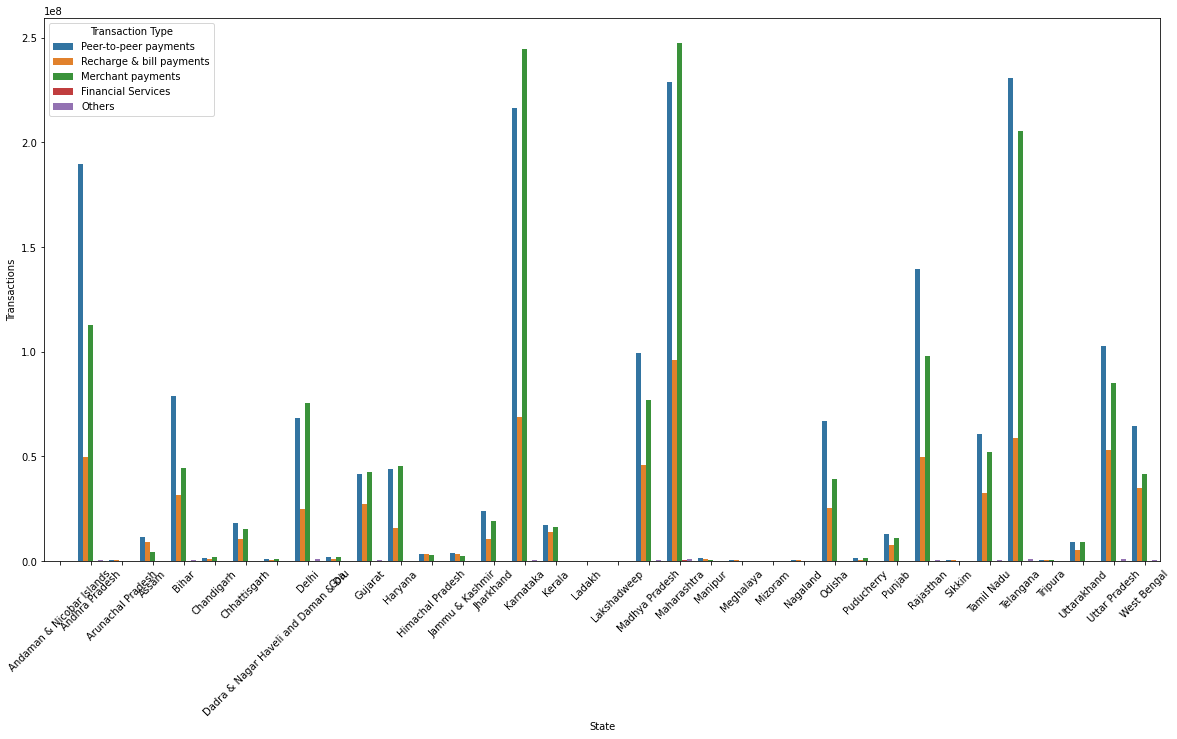

In [23]:
# Distribution of transaction types
# Create a bar chart showing the distribution of different transaction types 
# for each state for the most recent quarter in the dataset.

latest_year = state_txnsplit['Year'].max()
latest_quarter = state_txnsplit[state_txnsplit['Year'] == latest_year]['Quarter'].max()
latest_txn = state_txnsplit[(state_txnsplit['Year']==latest_year) & (state_txnsplit['Quarter'] == latest_quarter)]
plt.figure(figsize = (20,10))
sns.barplot(data = latest_txn, x = 'State', y = 'Transactions', hue = 'Transaction Type')
plt.xticks(rotation = 45)
latest_txn

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
1389,Madhya Pradesh,2021,2,Peer-to-peer payments,99367521,3.489358e+11,3511.567549
1390,Madhya Pradesh,2021,2,Merchant payments,77113464,5.883939e+10,763.023594
1391,Madhya Pradesh,2021,2,Recharge & bill payments,46118636,1.723055e+10,373.613530
1392,Madhya Pradesh,2021,2,Financial Services,188726,1.773134e+08,939.528150
1393,Madhya Pradesh,2021,2,Others,526333,3.177536e+08,603.712110


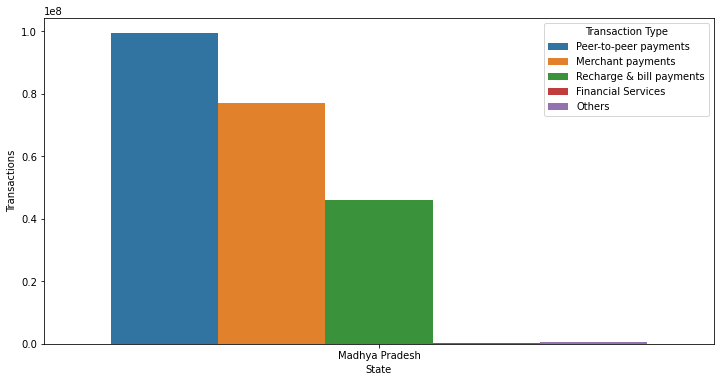

In [24]:
def state_txntype(state):
    latest_txn_state = latest_txn[latest_txn['State'] == state]
    plt.figure(figsize = (12,6))
    sns.barplot(data = latest_txn_state, x = 'State', y = 'Transactions', hue = 'Transaction Type')
    return latest_txn_state
    
state_txntype('Madhya Pradesh')

In [25]:
#: Find unique mapping between district name and district code
#1. Identify the unique mapping between district names and district codes from the dataset. [hint: you can use drop_duplicates ()]
#2. Create a CSV file containing the unique district name and district code mappings.
#3. Export the CSV file.
district_demographics['District'] = district_demographics['District'].str.strip()
district_demographics['Code'] = district_demographics['Code'].str.strip()
unique_mapping = district_demographics[['District','Code']].drop_duplicates()
duplicates_in_code = unique_mapping['Code'].duplicated().sum()
duplicates_in_district = unique_mapping['District'].duplicated().sum()
duplicates_in_code
duplicates_in_district
unique_mapping.to_csv('district_code_mapping.csv', index = False)

0

6

In [29]:
#For each state, calculate the total number of transactions, total transaction amount, 
#and total registered users by summing up the values from the district level data
state_summary_district = district_txn.groupby('State').agg(district_transaction = ('Transactions','sum'),
                                                           district_amount = ('Amount (INR)','sum')).reset_index()
state_summary = state_txn.groupby('State').agg(state_transaction = ('Transactions','sum'),
                                                           state_amount = ('Amount (INR)','sum')).reset_index()
# Check for exact match
are_same = state_summary_district.equals(state_summary)
are_same

False

In [41]:
comparison_df = state_summary.merge(state_summary_district, on = 'State', how = 'inner')
(comparison_df['district_amount'] - comparison_df['state_amount']).round(4)
#Good match: Aggregated district-level data almost equals state-level data
#Floating point precision issues — normal and expected in real-world financial systems

0     0.0000
1    -0.0083
2    -0.0000
3     0.0001
4     0.0010
5     0.0000
6    -0.0007
7     0.0000
8     0.0005
9    -0.0000
10    0.0007
11   -0.0007
12    0.0002
13   -0.0000
14   -0.0002
15    0.0054
16    0.0001
17   -0.0000
18    0.0000
19   -0.0078
20    0.0020
21    0.0000
22    0.0000
23   -0.0000
24   -0.0000
25    0.0017
26   -0.0000
27    0.0002
28   -0.0059
29   -0.0000
30    0.0059
31   -0.0010
32    0.0000
33    0.0068
34    0.0001
35    0.0015
dtype: float64

In [54]:
#Ratio of users to population by state
#Merge the State_Txn and Users dataset with the District Demographics dataset 
#to calculate the ratio of registered users to the population for each state.
state_users = state_txn.groupby(['State','Year'])['Registered Users'].sum().reset_index()
state_population = district_demographics.groupby('State')['Population'].sum().reset_index()
state_user_population = state_users.merge(state_population, on = 'State', how = 'left')
state_user_population['User_population_ratio'] = state_user_population['Registered Users']/state_user_population['Population']
state_user_population

,State,Year,Registered Users,Population,User_population_ratio
0,Andaman & Nicobar Islands,2018,43516,380581,0.114341
1,Andaman & Nicobar Islands,2019,90218,380581,0.237053
2,Andaman & Nicobar Islands,2020,154809,380581,0.406770
3,Andaman & Nicobar Islands,2021,119853,380581,0.314921
4,Andhra Pradesh,2018,20024016,49378776,0.405519
...,...,...,...,...,...
139,Uttarakhand,2021,5806162,10116752,0.573916
140,West Bengal,2018,17569602,92828987,0.189268
141,West Bengal,2019,36590500,92828987,0.394171
142,West Bengal,2020,55293303,92828987,0.595647


,State,Year,Registered Users,Population,User_population_ratio
3,Andaman & Nicobar Islands,2021,119853,380581,0.314921
7,Andhra Pradesh,2021,37984638,49378776,0.769250
11,Arunachal Pradesh,2021,521812,1606047,0.324905
15,Assam,2021,6975504,34461385,0.202415
19,Bihar,2021,28918422,103817951,0.278549
23,Chandigarh,2021,868570,1055450,0.822938
27,Chhattisgarh,2021,9351606,25867958,0.361513
31,Dadra & Nagar Haveli and Daman & Diu,2021,666390,586956,1.135332
35,Delhi,2021,21649909,16787941,1.289611
39,Goa,2021,1179141,1457723,0.808892


<Figure size 1008x576 with 0 Axes>

<AxesSubplot:xlabel='User_population_ratio', ylabel='State'>

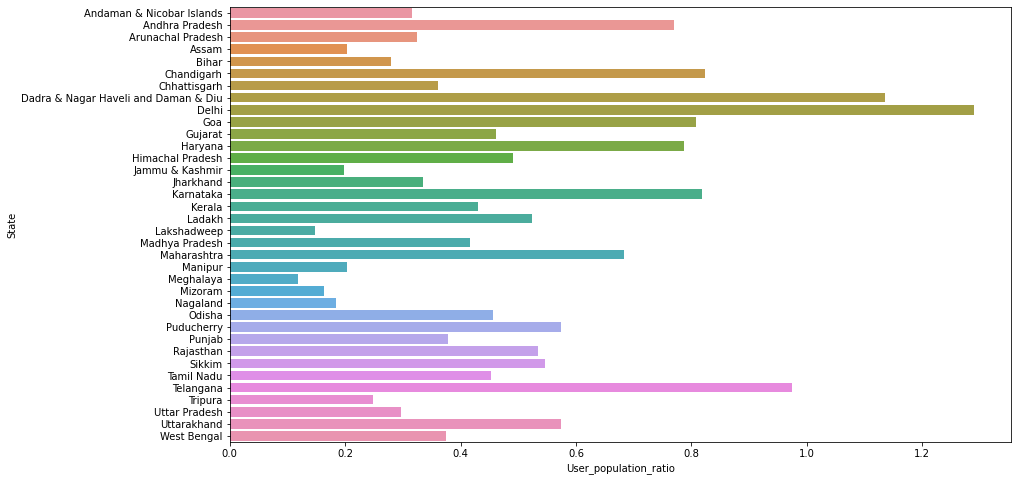

In [60]:
#for latest year users population ratio
latest_year_upr = state_user_population[state_user_population['Year'] == 2021]
latest_year_upr
plt.figure(figsize = (14,8))
sns.barplot(data = latest_year_upr, x = 'User_population_ratio', y = 'State')

0.307704108755929

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Density', ylabel='Transactions'>

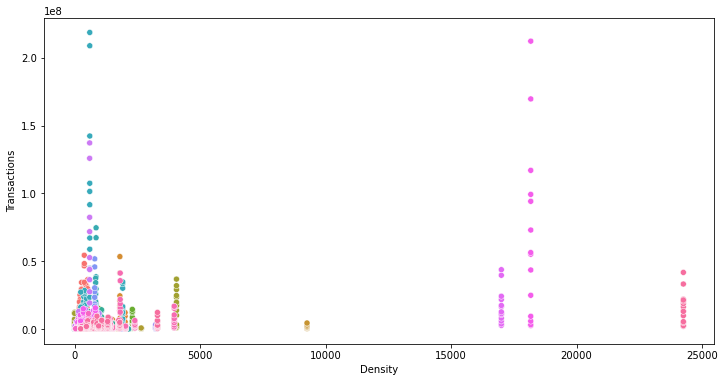

In [67]:
#Calculate the correlation between population density and transaction volume.
merged_df = pd.merge(district_txn,district_demographics, on = ['State','District'], how = 'inner')
correlation = merged_df['Density'].corr(merged_df['Transactions'])
correlation
#Positive Correlation: Since the value is positive, it means that as population density increases, 
#transaction volume also tends to increase.
#Strength of Correlation:A value of 0.30 indicates a weak to moderate positive relationship.
#It's not very strong, but there is some association.
plt.figure(figsize = (12,6))
sns.scatterplot(data = merged_df, x = 'Density', y = 'Transactions', hue = 'State', legend = False)

In [72]:
#Average transaction amount per user
state_avg_txnamount_user = state_txn.groupby('State')[['Amount (INR)','Registered Users']].sum().reset_index()
state_avg_txnamount_user['Avg_txnamount_per_user'] = state_avg_txn_user['Amount (INR)']/state_avg_txn_user['Registered Users']
#top 5 states with the highest average transaction amount per user
state_avg_txnamount_user.sort_values(by = 'Avg_txnamount_per_user', ascending = False).head(5)
#top 5 states with the lowest average transaction amount per user
state_avg_txnamount_user.sort_values(by = 'Avg_txnamount_per_user', ascending = False).tail(5)

,State,Amount (INR),Registered Users,Avg_Transaction_per_User
31,Telangana,4.574246e+12,149224214,30653.509622
1,Andhra Pradesh,3.860292e+12,158007957,24430.998364
15,Karnataka,4.361396e+12,203098564,21474.282206
28,Rajasthan,2.625584e+12,149770064,17530.768707
8,Delhi,1.649942e+12,95374654,17299.587909


,State,Amount (INR),Registered Users,Avg_Transaction_per_User
12,Himachal Pradesh,9.786546e+10,13373980,7317.601442
16,Kerala,3.729599e+11,51267042,7274.846690
7,Dadra & Nagar Haveli and Daman & Diu,1.865878e+10,2701112,6907.815954
32,Tripura,2.097051e+10,3661575,5727.184275
18,Lakshadweep,1.921587e+08,34223,5614.898889


In [79]:
#Device brand usage ratio
combined_df = pd.merge(state_devicedata,state_txn, on = ['State','Year','Quarter'], suffixes = ('_brand','_state'))
combined_df['Brand_Usage_Ratio'] = (combined_df['Registered Users_brand']/combined_df['Registered Users_state']).round(4)
brand_usage_ratio_df = combined_df[['State', 'Year', 'Quarter', 'Brand', 'Brand_Usage_Ratio']]
brand_usage_ratio_df

,State,Year,Quarter,Brand,Brand_Usage_Ratio
143,Andaman & Nicobar Islands,2021,2,Vivo,0.2425
144,Andaman & Nicobar Islands,2021,2,Xiaomi,0.2382
145,Andaman & Nicobar Islands,2021,2,Samsung,0.1848
146,Andaman & Nicobar Islands,2021,2,Oppo,0.0879
147,Andaman & Nicobar Islands,2021,2,Realme,0.0650
...,...,...,...,...,...
5539,West Bengal,2021,2,Lenovo,0.0195
5540,West Bengal,2021,2,Asus,0.0166
5541,West Bengal,2021,2,Huawei,0.0152
5542,West Bengal,2021,2,Apple,0.0112


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Brand_Usage_Ratio', ylabel='State'>

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Brand_Usage_Ratio', ylabel='State'>

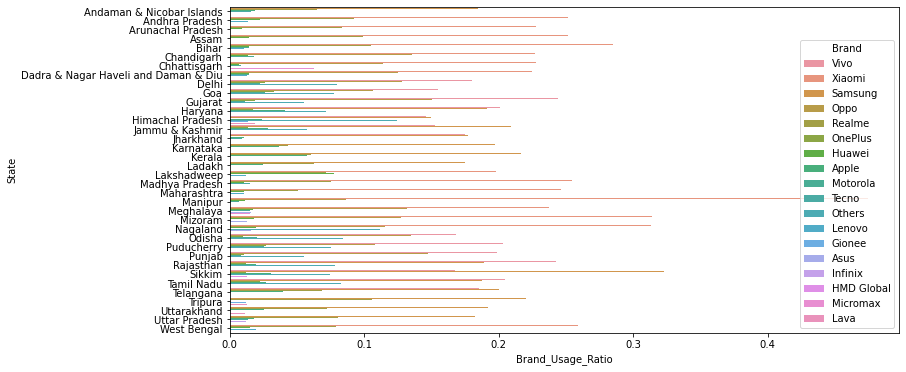

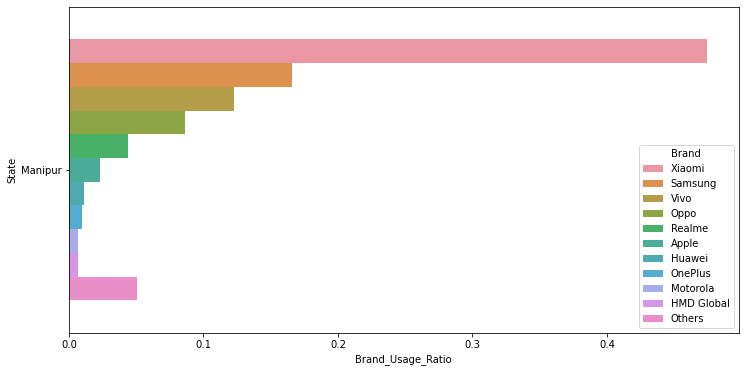

In [88]:
#for latest year and quarter
latest_df = brand_usage_ratio_df[(brand_usage_ratio_df['Year'] == 2021) & (brand_usage_ratio_df['Quarter'] == 2)]

plt.figure(figsize = (12,6))
sns.barplot(data = latest_df, x = 'Brand_Usage_Ratio', y = 'State', hue = 'Brand')

state_wise = latest_df.loc[latest_df['State']=='Manipur',:]
plt.figure(figsize = (12,6))
sns.barplot(data = state_wise, x = 'Brand_Usage_Ratio', y = 'State', hue = 'Brand')

C:\Users\himanshu mishra\AppData\Local\Temp\ipykernel_17028\3282804885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  each_state['Year_Qtr'] = each_state['Year'].astype(str)+'Q'+each_state['Quarter'].astype(str)


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,Year_Qtr
210,Karnataka,2018,1,12016899,1.921790e+10,1599.239148,3717763,0,2018Q1
211,Karnataka,2018,2,17116447,3.351558e+10,1958.092125,5030665,0,2018Q2
212,Karnataka,2018,3,25980261,4.822509e+10,1856.220450,6372649,0,2018Q3
213,Karnataka,2018,4,44812071,7.300839e+10,1629.212508,8315802,0,2018Q4
214,Karnataka,2019,1,86587609,1.179764e+11,1362.508834,10266174,0,2019Q1
215,Karnataka,2019,2,115401604,1.637020e+11,1418.542018,11968087,113024811,2019Q2
216,Karnataka,2019,3,170733735,2.145367e+11,1256.557296,13635075,445683660,2019Q3
217,Karnataka,2019,4,237796252,2.950471e+11,1240.756071,15385416,569674870,2019Q4
218,Karnataka,2020,1,271033890,3.534021e+11,1303.903563,17016980,626488036,2020Q1
219,Karnataka,2020,2,213221712,3.211049e+11,1505.967071,18655366,490510075,2020Q2


<AxesSubplot:xlabel='Year_Qtr', ylabel='Transactions'>

<AxesSubplot:xlabel='Year_Qtr', ylabel='Amount (INR)'>

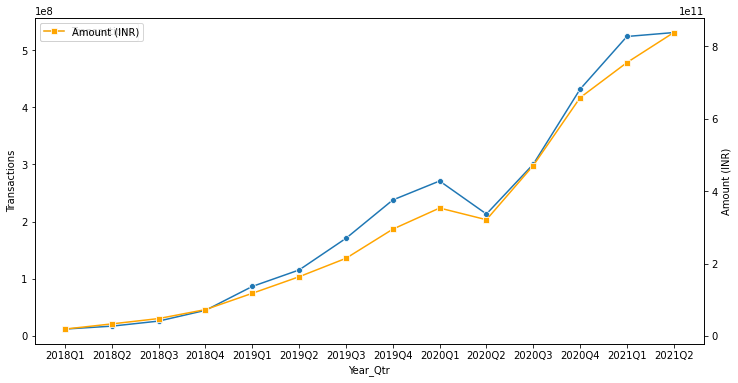

In [97]:
#Plot the total transactions and amount over time for a selected state
each_state = state_txn.loc[state_txn['State'] == 'Karnataka',:]
each_state['Year_Qtr'] = each_state['Year'].astype(str)+'Q'+each_state['Quarter'].astype(str)
each_state
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data = each_state, x = 'Year_Qtr', y = 'Transactions', label = 'Transactions', marker = 'o')

ax2 = ax1.twinx()
sns.lineplot(data = each_state, x = 'Year_Qtr', y = 'Amount (INR)', label = 'Amount (INR)',marker = 's' ,color = 'orange')
